In [1]:
import os
os.chdir('drive/MyDrive/NLP/webtranscripts')

In [2]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,brandpoint,bruceclay,developers,jdrgroup,neilpatel1,reliablesoft,wordstream
ability,0,1,0,0,1,0,0
able,1,1,1,0,0,2,1
absolutely,0,0,0,0,2,0,0
accelerated,0,0,2,0,0,0,0
acceptable,0,0,0,1,0,0,0


In [ ]:

# Find the top 30 words in each website for seo
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

In [ ]:
# Print the top 15 words said by each comedian
for websites, top_words in top_dict.items():
    print(websites)
    print(', '.join([word for word, count in top_words[0:15]]))
    print('---')

In [9]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for website in data.columns:
    top = [word for (word, count) in top_dict[website]]
    for t in top:
        words.append(t)
        
len(words)

210

In [ ]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

In [ ]:

# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 3]
add_stop_words

In [12]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [17]:
data_clean

,transcript
brandpoint,reviewing key factor creating highquality cont...
bruceclay,youve written article think pretty good fit co...
developers,manage monetize promote online content via goo...
jdrgroup,seo article opposed type written content cross...
neilpatel1,want traffic yes want trafficno enough traffic...
reliablesoft,alex comment one critical factor achieving lon...
wordstream,wordstream come known mostly ppc destination a...


In [13]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

0 brandpoint
1 bruceclay
2 developers
3 jdrgroup
4 neilpatel1
5 reliablesoft
6 wordstream


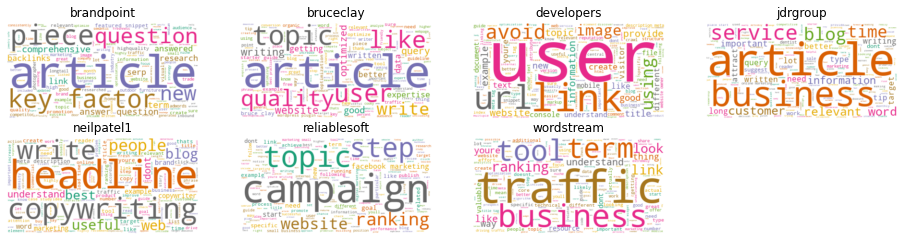

In [22]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

websites = ['brandpoint', 'bruceclay', 'developers','jdrgroup', 'neilpatel1', 'reliablesoft', 'wordstream']

# Create subplots for each website content
for index, website in enumerate(data.columns):
    print(index,website)
    wc.generate(data_clean.transcript[website])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(websites[index])
    
plt.show()

#Analysis Word count

In [24]:

# Find the number of unique words that each website uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for website in data.columns:
    uniques = data[website].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(websites, unique_list)), columns=['website', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,website,unique_words
3,jdrgroup,342
1,bruceclay,458
5,reliablesoft,502
0,brandpoint,546
6,wordstream,871
4,neilpatel1,947
2,developers,1015


this word count may help afterwards. It can be a parameter of amount of knowledge
